---
#                                                                          **Tesla Sales Analysi and Performance**
---

In [294]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')



In [43]:
df = pd.read_excel("Tesla sales data.xlsx")

In [44]:
df.head()

,Model,Period,Country,Purchase type,Version,Price,Gross Profit
0,Model S,201601,US,Deposit,75D AWD,75700,22407.268985
1,Model S,201601,US,Cash purchase,75D AWD,75700,22407.268985
2,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
3,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
4,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428


In [45]:
for i in [col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique())<= 10]:
    print(i)
    print(df[i].unique())
    print('_'*100)

Model
['Model S' 'Model X']
____________________________________________________________________________________________________
Country
['US' 'Germany' 'Australia']
____________________________________________________________________________________________________
Purchase type
['Deposit' 'Cash purchase']
____________________________________________________________________________________________________
Version
['75D AWD' '75 RWD' '90D AWD' '60D AWD' '90D' 'P90D']
____________________________________________________________________________________________________


In [46]:
df.shape

(85592, 7)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85592 entries, 0 to 85591
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          85592 non-null  object 
 1   Period         85592 non-null  int64  
 2   Country        85592 non-null  object 
 3   Purchase type  85592 non-null  object 
 4   Version        85592 non-null  object 
 5   Price          85592 non-null  int64  
 6   Gross Profit   85592 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.6+ MB


---
# **Data Processing/ feature ingeneering**
---

* **first we need to perfom some data cleaning on Period feature so that we can extract the Year feature**
* **second we will create a new feature profitability ratio and Cost ratio** 

In [48]:
import re 

In [49]:
df.head()

,Model,Period,Country,Purchase type,Version,Price,Gross Profit
0,Model S,201601,US,Deposit,75D AWD,75700,22407.268985
1,Model S,201601,US,Cash purchase,75D AWD,75700,22407.268985
2,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
3,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
4,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428


In [50]:
df['date'] = pd.to_datetime(df['Period'],format='%Y%m')
df['year'] = df['date'].dt.year

In [52]:
df.drop('Period',axis=1,inplace=True)

In [98]:
# Profitability Ratio
df['Profitability Ratio'] = df['Gross Profit']/df['Price']
df['Cost Ratio'] = 1-df['Profitability Ratio']
df.head(5)

,Model,Country,Purchase type,Version,Price,Gross Profit,date,year,Profitability Ratio,Cost Ratio
0,Model S,US,Deposit,75D AWD,75700,22407.268985,2016-01-01,2016,0.296001,0.703999
1,Model S,US,Cash purchase,75D AWD,75700,22407.268985,2016-01-01,2016,0.296001,0.703999
2,Model S,US,Cash purchase,75 RWD,70700,20927.264428,2016-01-01,2016,0.296001,0.703999
3,Model S,US,Cash purchase,75 RWD,70700,20927.264428,2016-01-01,2016,0.296001,0.703999
4,Model S,US,Cash purchase,75 RWD,70700,20927.264428,2016-01-01,2016,0.296001,0.703999


------
# **frequency of Categorical data** 
------

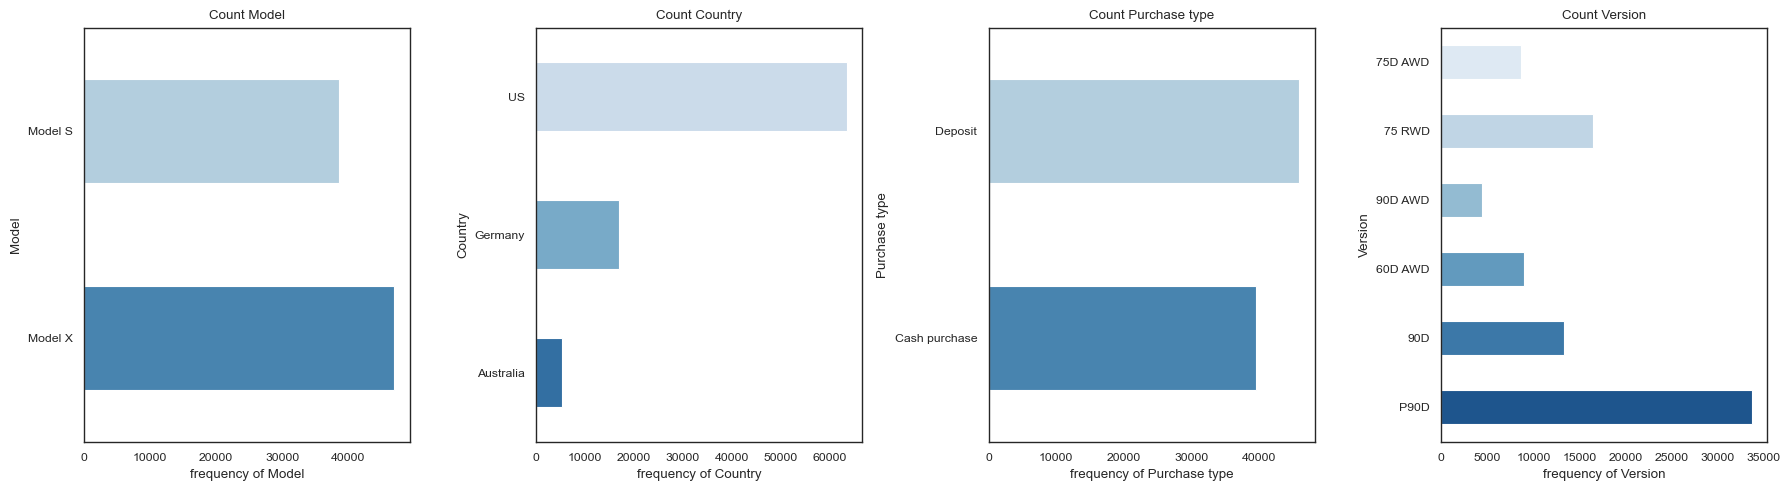

In [295]:
cols = [col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique())<= 10]
fig,ax = plt.subplots(1,4,figsize=(18,5))
ax=ax.flatten()
for i, c in enumerate(cols):
    sns.countplot(df,y=c,palette='Blues',ax=ax[i],hue=c,legend=False,width=0.5)
    ax[i].set_title(f'Count {c}')
    ax[i].set_xlabel(f'frequency of {c}')
plt.tight_layout()    


-----
# **``Sales`` and ``profit`` evolution**
-----

In [310]:
df.columns

Index(['Model', 'Country', 'Purchase type', 'Version', 'Price', 'Gross Profit',
       'date', 'year', 'Profitability Ratio', 'Cost Ratio'],
      dtype='object')

-----
# **``profitability Ratio`` and ``cost Ratio`` evolution**
-----

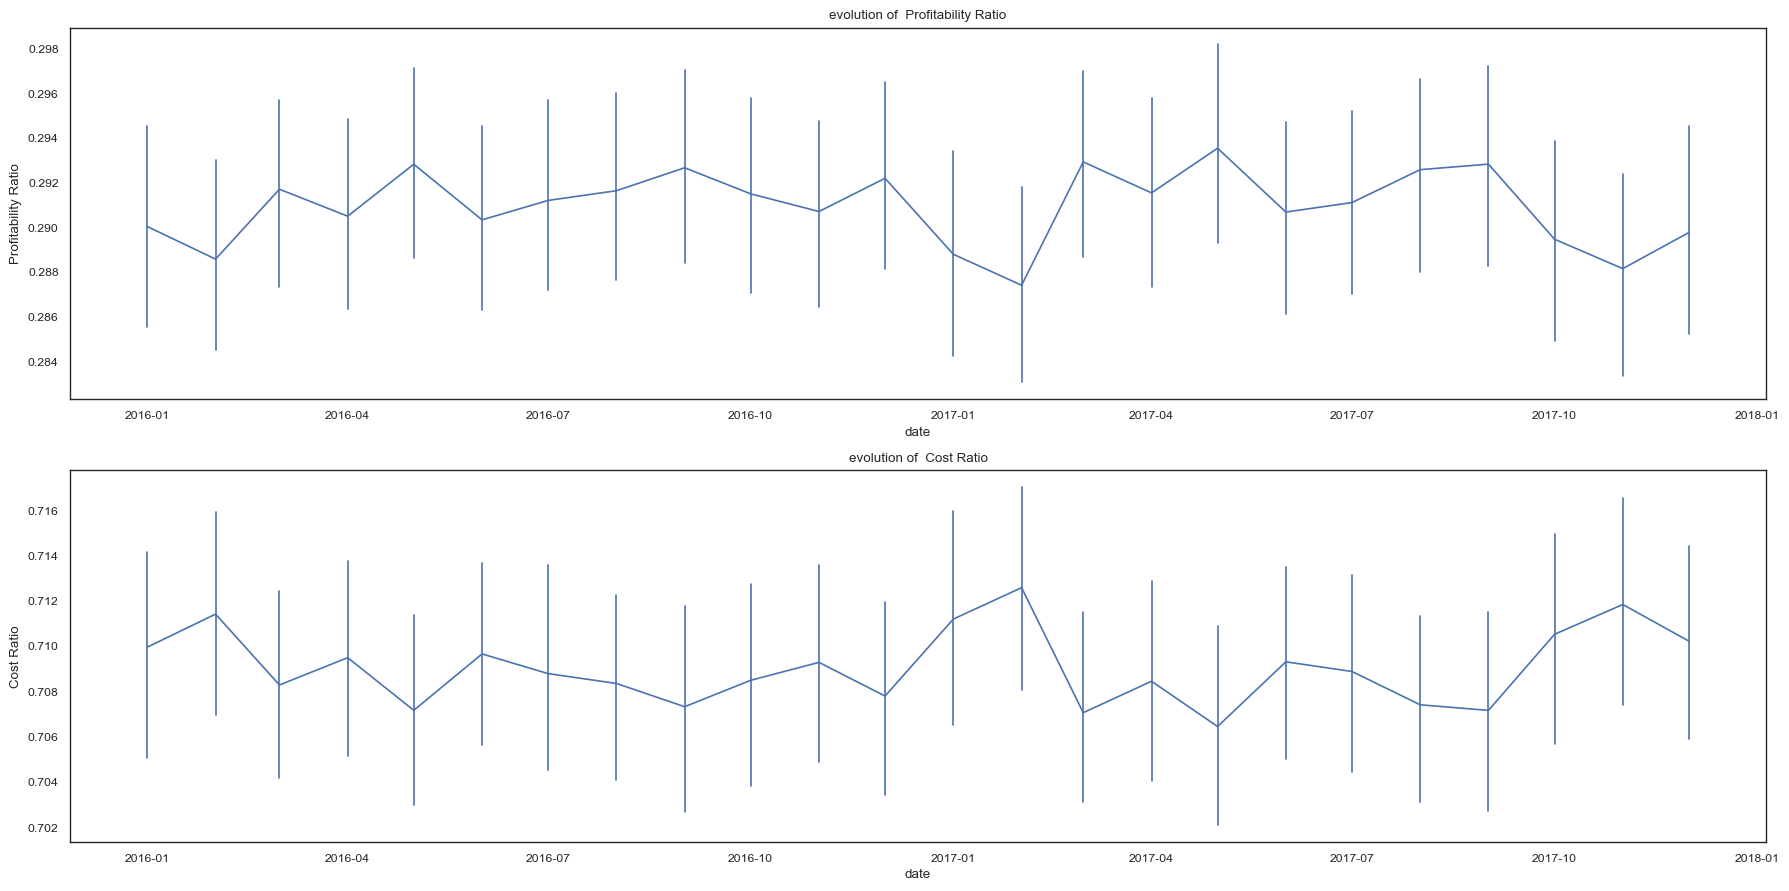

In [314]:
fig,ax = plt.subplots(2,1,figsize=(18,9))
ax=ax.flatten()
for i, c in enumerate(['Profitability Ratio', 'Cost Ratio']):
    sns.lineplot(df,x='date',y=c,ax=ax[i],estimator=np.mean,err_style='bars')
    ax[i].set_title(f'evolution of  {c}')
plt.tight_layout()

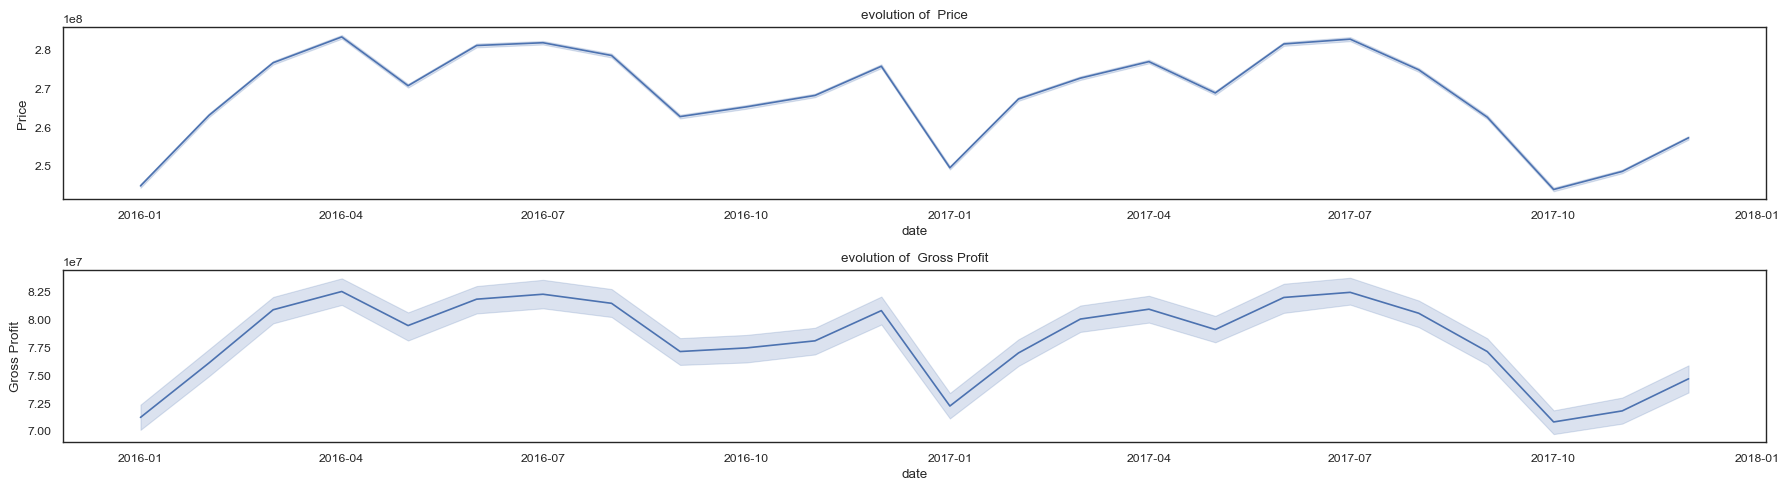

In [296]:

fig,ax = plt.subplots(2,1,figsize=(18,5))
ax=ax.flatten()
for i, c in enumerate(['Price','Gross Profit']):
    sns.lineplot(df,x='date',y=c,ax=ax[i],estimator=sum)
    ax[i].set_title(f'evolution of  {c}')
plt.tight_layout()

---
# **``Sales`` and ``profit`` evolution in 2016** 
---

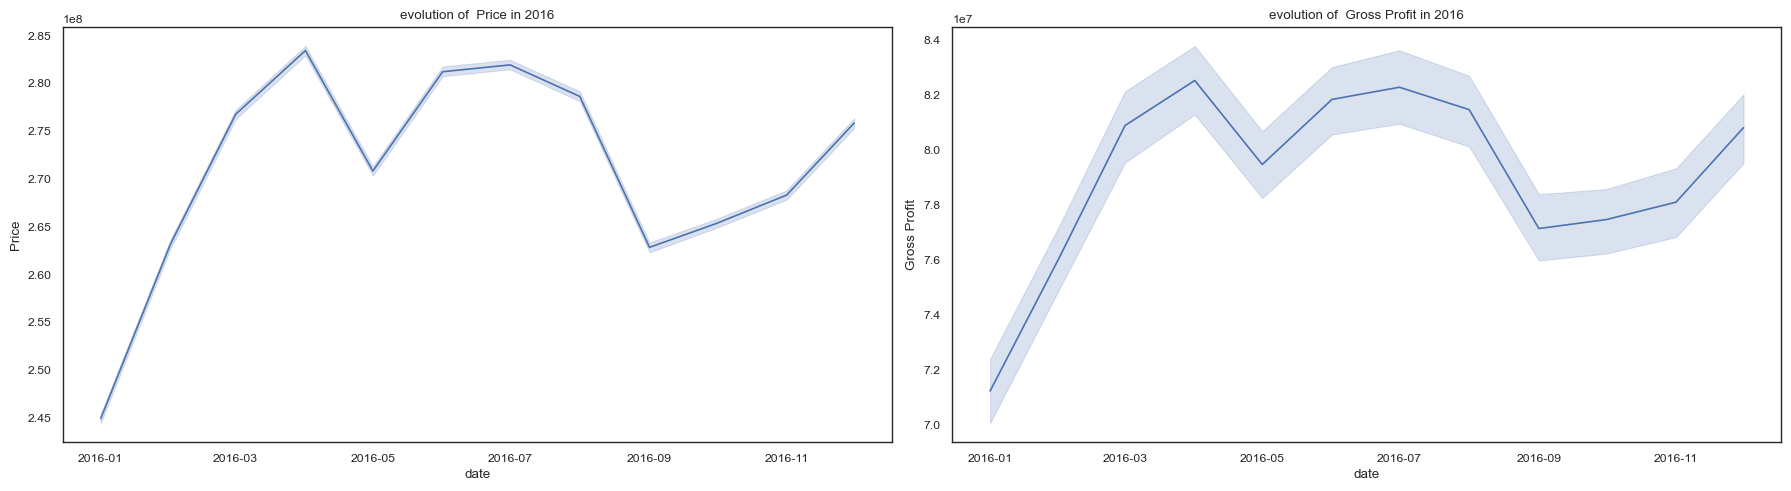

In [298]:
fig,ax = plt.subplots(1,2,figsize=(18,5))
ax=ax.flatten()
for i, c in enumerate(['Price','Gross Profit']):
    data = df.query('year == 2016')
    sns.lineplot(data,x='date',y=c,ax=ax[i],estimator=sum)
    ax[i].set_title(f'evolution of  {c} in 2016')
plt.tight_layout()

-----
# **``Sales`` and ``profit`` evolution in 2017** 
-----

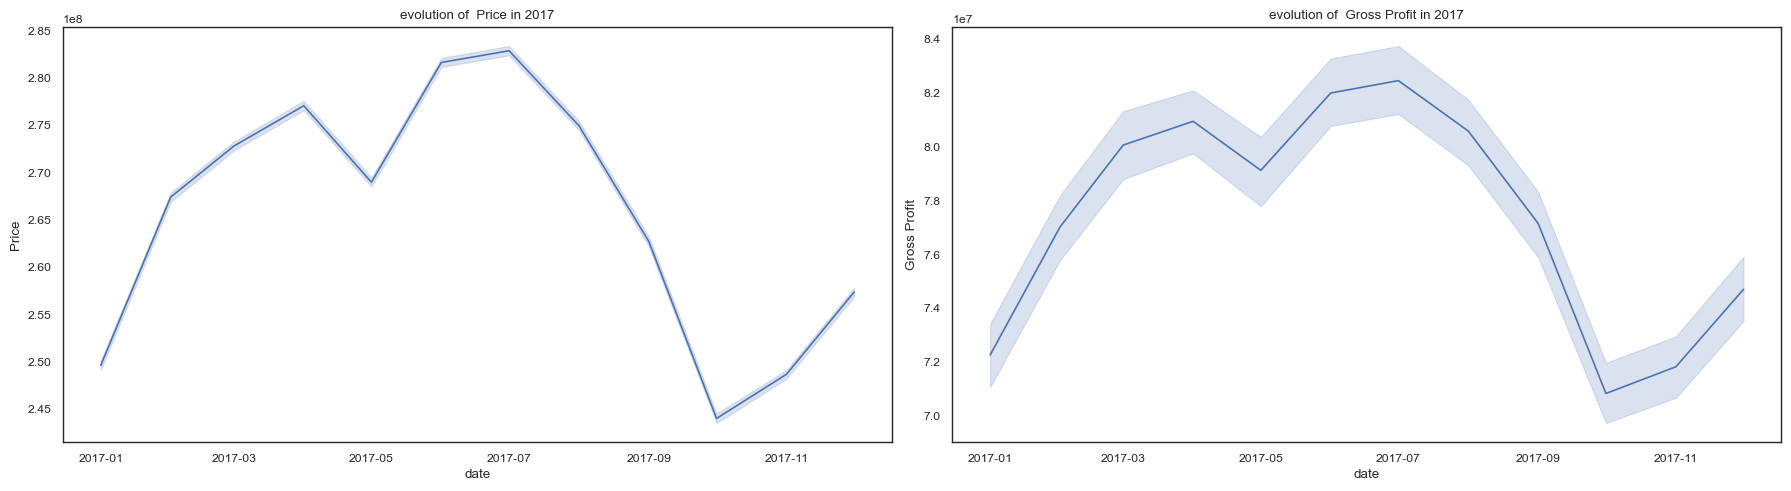

In [299]:
fig,ax = plt.subplots(1,2,figsize=(18,5))
ax=ax.flatten()
for i, c in enumerate(['Price','Gross Profit']):
    data = df.query('year == 2017')
    sns.lineplot(data,x='date',y=c,ax=ax[i],estimator=sum)
    ax[i].set_title(f'evolution of  {c} in 2017')
plt.tight_layout()

-----
# **``Sales`` and ``profit`` evolution of model S** 
-----

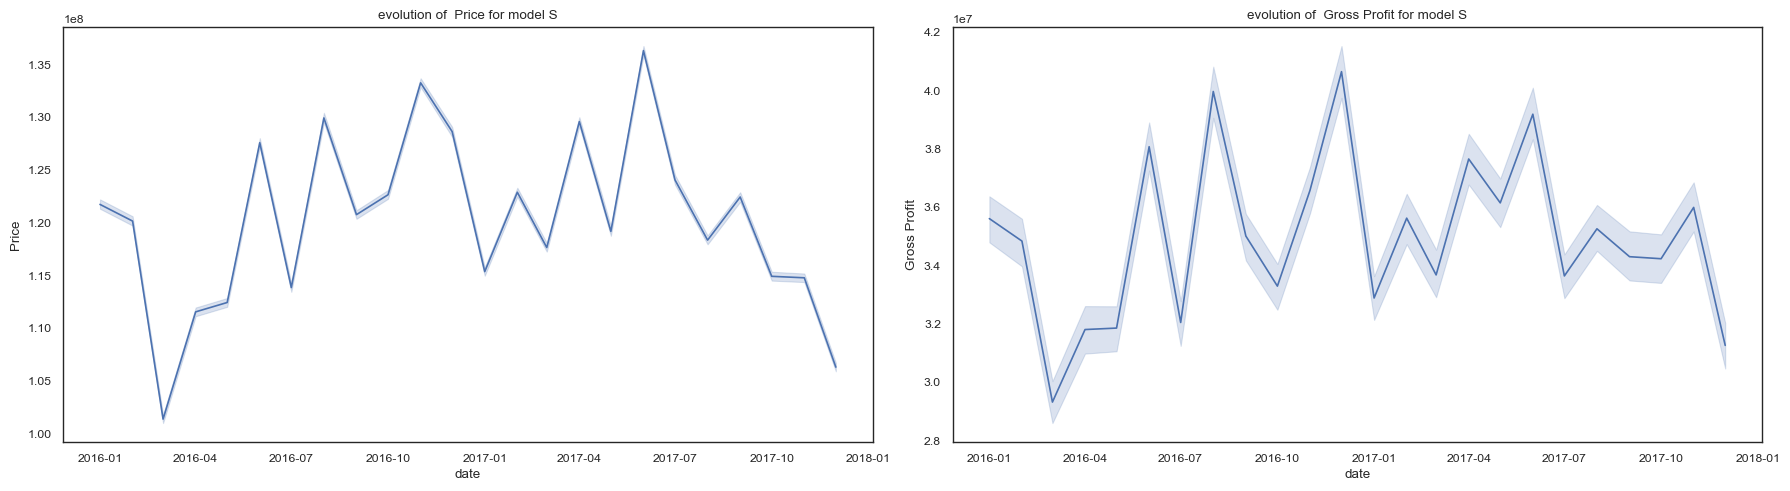

In [300]:
fig,ax = plt.subplots(1,2,figsize=(18,5))
ax=ax.flatten()
for i, c in enumerate(['Price','Gross Profit']):
    data = df.query('Model == "Model S"')
    sns.lineplot(data,x='date',y=c,ax=ax[i],estimator=sum)
    ax[i].set_title(f'evolution of  {c} for model S')
plt.tight_layout()

-----
# **``Sales`` and ``profit`` evolution of model M** 
-----

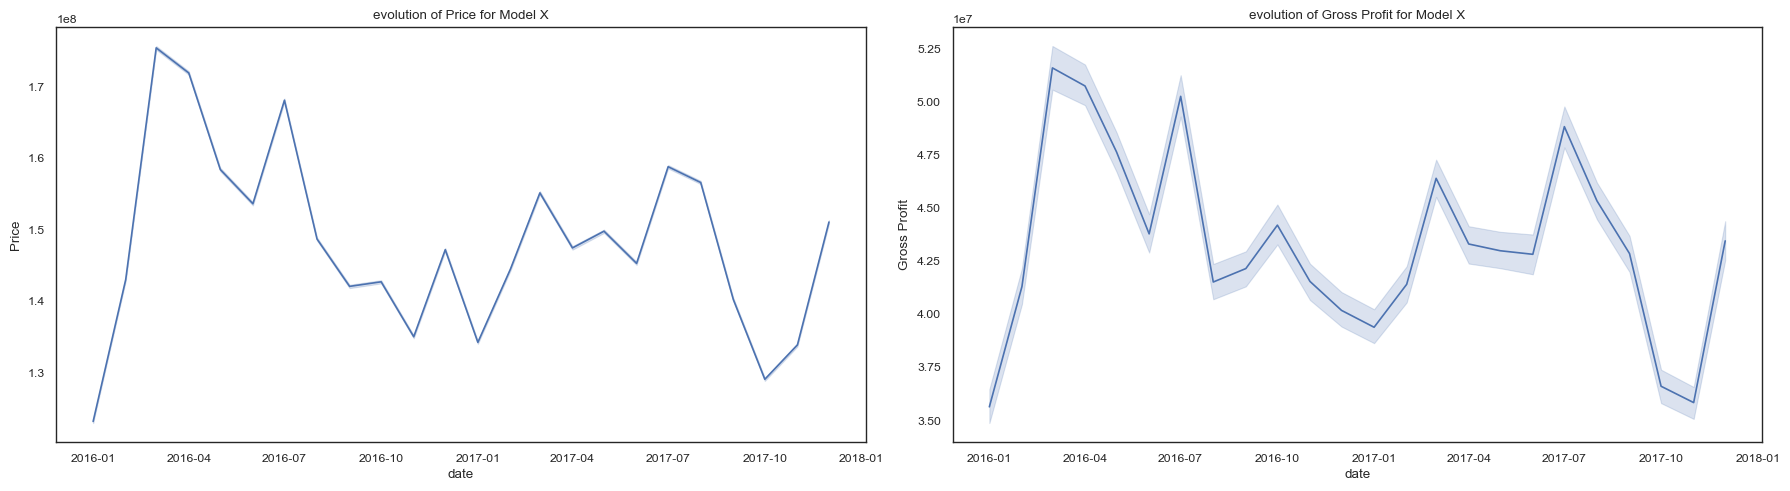

In [301]:
fig,ax = plt.subplots(1,2,figsize=(18,5))
ax=ax.flatten()
for i, c in enumerate(['Price','Gross Profit']):
    data = df.query('Model == "Model X"')
    sns.lineplot(data,x='date',y=c,ax=ax[i],estimator=sum,err_style='band')
    ax[i].set_title(f'evolution of {c} for Model X')
plt.tight_layout()

In [302]:
from markdown import markdown
from IPython.display import display, Markdown

 ### **Total sales by ``model`` ,``Country``, ``Version`` and ``Purshase Type``**

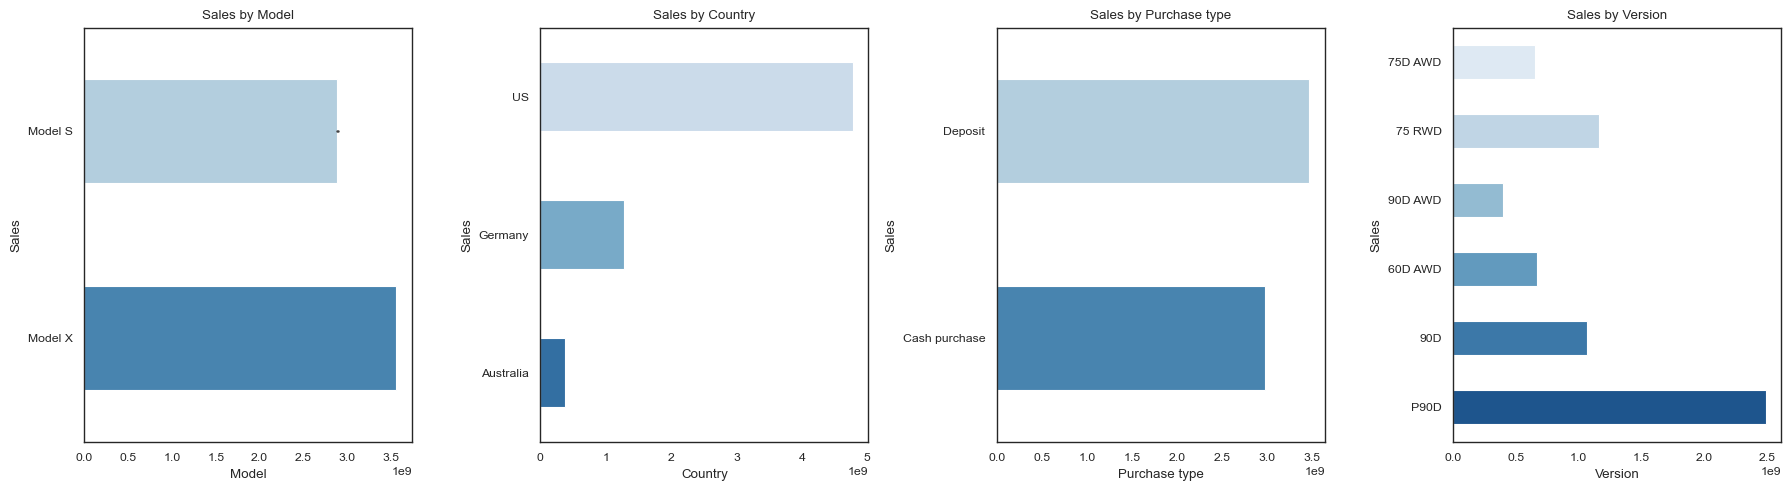

In [303]:
cols = [col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique())<= 10]
fig,ax = plt.subplots(1,4,figsize=(18,5))
ax=ax.flatten()
text = " ### **Total sales by ``model`` ,``Country``, ``Version`` and ``Purshase Type``**"
display(Markdown(text))
for i, c in enumerate(cols):
    sns.barplot(df,y=c,x='Price',palette='Blues',ax=ax[i],hue=c,legend=False,width=0.5,estimator=sum)
    ax[i].set_title(f'Sales by {c}')
    ax[i].set_xlabel(f'{c}')
    ax[i].set_ylabel('Sales')
plt.tight_layout()   

 ### **Total Gross Profit by ``model`` ,``Country``, ``Version`` and ``Purshase Type``**

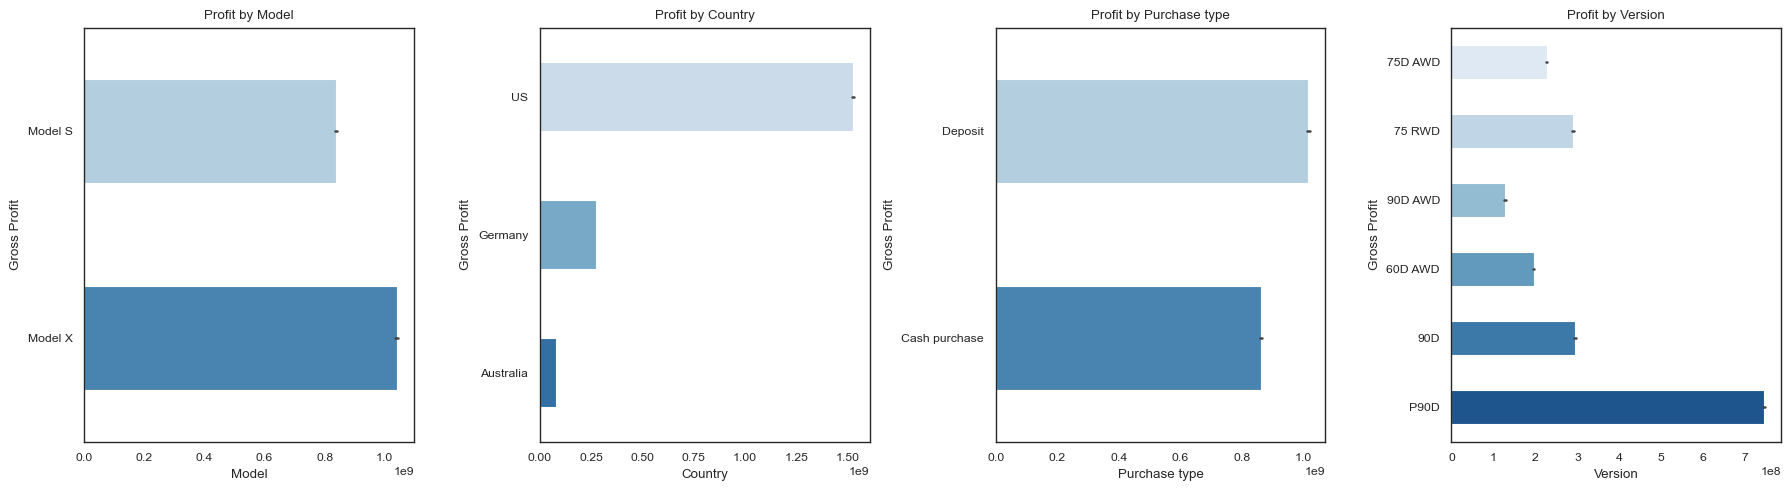

In [308]:
cols = [col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique())<= 10]
fig,ax = plt.subplots(1,4,figsize=(18,5))
ax=ax.flatten()
text = " ### **Total Gross Profit by ``model`` ,``Country``, ``Version`` and ``Purshase Type``**"
display(Markdown(text))
for i, c in enumerate(cols):
    sns.barplot(df,y=c,x='Gross Profit',palette='Blues',ax=ax[i],hue=c,legend=False,width=0.5,estimator=sum)
    ax[i].set_title(f'Profit by {c}')
    ax[i].set_xlabel(f'{c}')
    ax[i].set_ylabel('Gross Profit')
plt.tight_layout()   

-----
# **Sales Performance by car ``version``**
-----

In [304]:
def agg_table(name,flt):
    result = df.groupby(flt).agg(
        Total_sales = ('Price','sum'),
        Total_Profit = ('Gross Profit','sum'),
        Volume_sold = ('Model','count'),
        avg_profitability = ('Profitability Ratio','mean'))
    globals()[name]=result  


agg_table('SP_Version','Version')
SP_Version.reset_index(inplace=True)

In [305]:
SP_Version_1

,Version,Total_sales,Total_Profit,Volume_sold,avg_profitability
0,60D AWD,670174400,195520130.990149,9032,0.291745
1,75 RWD,1165984400,289395214.936260,16492,0.248198
2,75D AWD,655562000,226532186.394293,8660,0.345554
3,90D,1064960000,294891380.596110,13312,0.276904
4,90D AWD,393916700,127351729.277026,4441,0.323296
5,P90D,2490470000,744668953.967231,33655,0.299007


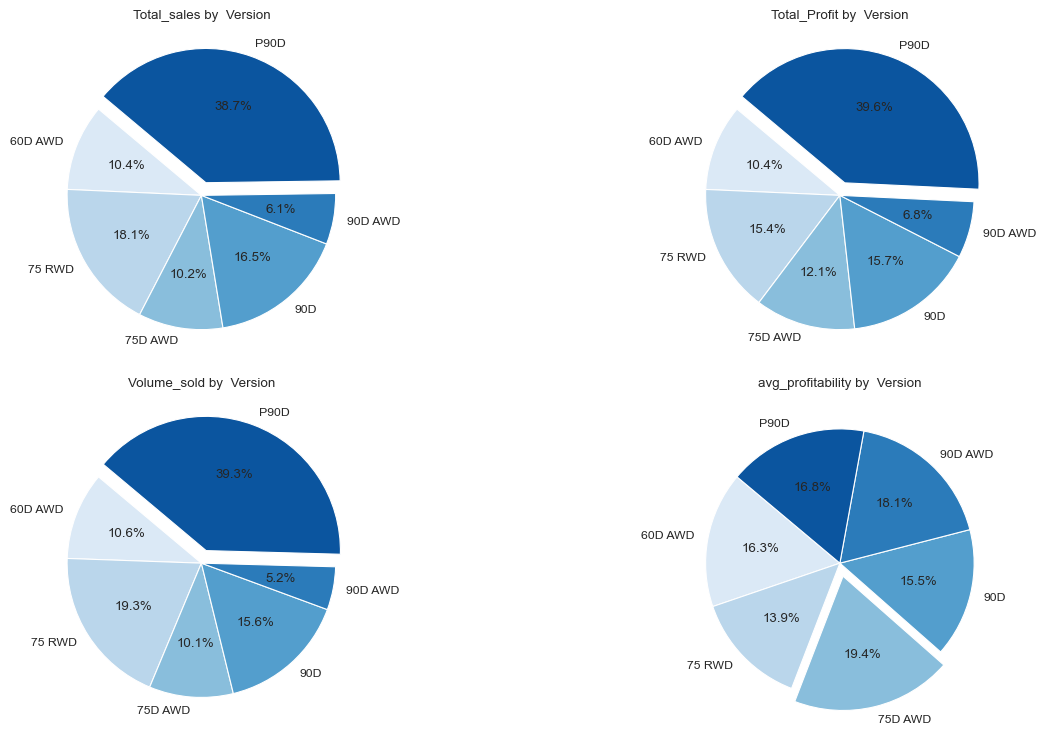

In [306]:
def plot_summary(data,flt):
    fig,ax = plt.subplots(2,2,figsize=(20,7.5))
    ax=ax.flatten()
    colors = sns.color_palette("Blues", len(data))
    for i , c in enumerate(data.iloc[:,1:].columns):
        explode = [0.1 if val == data[c].max() else 0 for val in data[c]]

        ax[i].pie(data[c],labels=data[flt],autopct='%1.1f%%', startangle=140,explode=explode,colors=colors)
        ax[i].set_title(f'{c} by  {flt}')
        plt.tight_layout()    
plot_summary(SP_Version,'Version')

-----
# **Sales Performance by car ``Country``**
-----

In [261]:
agg_table('SP_Country','Country')
SP_Country.reset_index(inplace=True)
SP_Country_1 = SP_Country.style.background_gradient(cmap='Blues')
SP_Country_1

,Country,Total_sales,Total_Profit,Volume_sold,avg_profitability
0,Australia,378564400,80356233.522528,5167,0.211766
1,Germany,1284433000,274277000.211334,16956,0.213506
2,US,4778070100,1523726362.427207,63469,0.318130


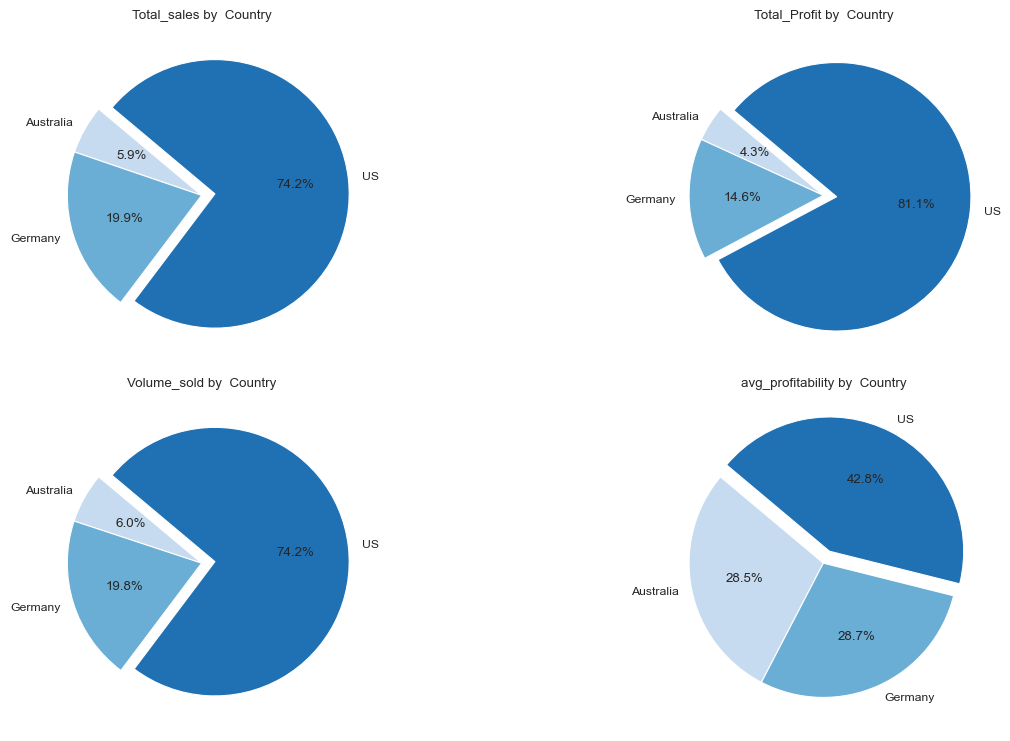

In [307]:
plot_summary(SP_Country,'Country')


In [315]:
df.head()

,Model,Country,Purchase type,Version,Price,Gross Profit,date,year,Profitability Ratio,Cost Ratio
0,Model S,US,Deposit,75D AWD,75700,22407.268985,2016-01-01,2016,0.296001,0.703999
1,Model S,US,Cash purchase,75D AWD,75700,22407.268985,2016-01-01,2016,0.296001,0.703999
2,Model S,US,Cash purchase,75 RWD,70700,20927.264428,2016-01-01,2016,0.296001,0.703999
3,Model S,US,Cash purchase,75 RWD,70700,20927.264428,2016-01-01,2016,0.296001,0.703999
4,Model S,US,Cash purchase,75 RWD,70700,20927.264428,2016-01-01,2016,0.296001,0.703999


# Analysis of Tesla Sales Performance Visualizations  

## 1. Categorical Data Frequency  
- **Count Plots**:   
  - **Model**: Shows the frequency of sales across models (e.g., Model S vs. Model X), indicating popularity.  
  - **Country**: Displays sales distribution across countries (e.g., US, Germany, Australia), identifying key markets.  
  - **Purchase Type**: Differentiates between deposits and cash purchases, reflecting customer preferences.  
  - **Version**: Shows popularity of different versions (e.g., 75D AWD, 90D AWD), informing production and marketing strategies.  

## 2. Sales and Profit Evolution  
- **Line Plots for Price and Gross Profit**:   
  - **Overall Trends**: A rising trend in both price and gross profit suggests increasing sales volume or price adjustments over time.  
  - **Yearly Breakdown**: Focused analysis of sales performance for 2016 and 2017, potentially highlighting seasonal trends or the impact of new model releases.  

## 3. Profitability and Cost Ratios  
- **Evolution of Profitability and Cost Ratios**:  
  - **Profitability Ratio**: A stable or increasing ratio indicates effective cost management and pricing strategies.  
  - **Cost Ratio**: A decreasing cost ratio suggests improved efficiency in production or sales processes.  

## 4. Sales Performance by Model  
- **Model-Specific Sales and Profit Plots**:  
  - **Model S**: Higher sales and profits suggest strong consumer preference.  
  - **Model X**: Comparatively lower sales or profits may indicate a need for marketing adjustments or product improvements.  

## 5. Total Sales and Gross Profit by Categories  
- **Bar Plots**:   
  - **Sales by Model/Country**: Identifies high-performing models in specific countries, guiding regional marketing strategies.  
  - **Profit by Version/Purchase Type**: Highlights which versions or purchase types yield the highest profits, informing inventory and pricing decisions.  

## 6. Aggregated Tables and Summary Visualizations  
- **Aggregated Sales Performance**:   
  - Tables summarizing total sales, total profit, volume sold, and average profitability by version and country provide a comprehensive overview.  
  - **Pie Charts**: Help in understanding the proportion of total sales and profits contributed by each category, identifying key drivers of revenue.  

## Conclusion  
The visualizations collectively provide a detailed view of Tesla's sales performance, revealing trends, consumer preferences, and profitability insights. This analysis can guide strategic decisions regarding marketing, production, and pricing.

In [ ]:
Tesla_Sales_Performance
jupyter nbconvert --to pdf Tesla_Sales_Performance.ipynb